#Problem 1

Dataset- Activity<br>
Dataset Description-Activity dataset shows how has global plastic waste disposal method changed over time.

TODO 1: Create an animated bar chart to illustrate how waste disposal methods have evolved over the years.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


In [ ]:
# Load the dataset
df = pd.read_excel('activity.xlsx')

# Clean the data by removing rows with missing values
clean_data = df.dropna()

# Pivot the data so that each waste disposal method is a column and each year is a row
pivot_data = clean_data.pivot(index='year', columns='Type', values='Value')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Update function for the animation
def update(year):
    ax.clear()  # Clear the previous plot
    year_data = pivot_data.loc[year].sort_values(ascending=False)  # Sort for better display
    ax.barh(year_data.index, year_data.values, color='skyblue')  # Horizontal bar chart
    ax.set_title(f"Waste Disposal Methods in {year}", fontsize=16)
    ax.set_xlabel('Value')
    ax.set_xlim(0, pivot_data.max().max() * 1.1)  # Adjust axis limits based on max values

# Create the animation object and assign it to a variable
years = pivot_data.index
ani = animation.FuncAnimation(fig, update, frames=years, repeat=False)

# Close the static figure to avoid showing it
plt.close(fig)

# Display the animation inline in Colab
HTML(ani.to_jshtml())


TODO 2: What key insights can you draw from the visualization

The following key insights can be derived from the visualization:
- Waste Generation has consistently remained the highest throughout the years, indicating that the amount of waste produced has been substantial and likely increased over time.
- Recycling shows a clear upward trend, gradually becoming a more prominent method of waste disposal, especially toward the later years (1990-2005). This suggests increased adoption of recycling practices over time.
- Landfilling and Other Disposal methods dominated earlier years, but they slowly decreased in prominence relative to recycling and other sustainable methods by 2005.
- Energy Recovery (combustion with energy recovery) began growing steadily, especially toward the latter part of the timeline (1990-2005), indicating that waste-to-energy processes gained some traction.
- Composting remained the least utilized method for the majority of the timeline, though there is likely a slow increase towards the end, indicating limited but growing use of organic waste treatment methods.


#Problem 2

Dataset - Global 500<br>
Dataset Description - Fortune Global 500 List is a list of largest corporations worldwide which are measured by their total fiscal year revenues. Companies rankings sorted by total revenues for their respective fiscal years ended on or before March 31 of the relevant year.

TODO 1: Using treemap infer which countries dominate the global revenue landscape
Interpret your key findings from the map<br>
Hint: Perform data preprocessing before plotting the map

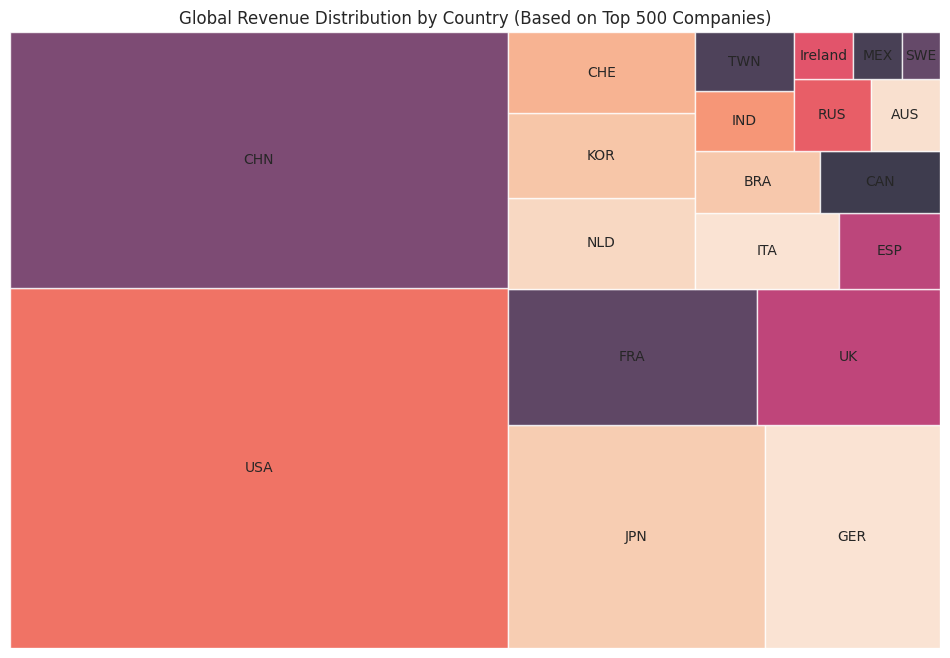

In [ ]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify

global_500_data = pd.read_excel('Global 500.xlsx')
global_500_data.head()

# Perform Data Preprocessing
# Clean the "Revenues($millions)" column by removing dollar signs and commas, then convert to numeric
global_500_data['Revenues($millions)'] = global_500_data['Revenues($millions)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Group by "Country" and sum the revenues for each country
country_revenue = global_500_data.groupby('Country')['Revenues($millions)'].sum().reset_index()

# Sort the data by revenue in descending order
country_revenue = country_revenue.sort_values('Revenues($millions)', ascending=False)

# Create a dictionary of abbreviations for country names
country_abbrev = {
    'United States': 'USA', 'China': 'CHN', 'Japan': 'JPN', 'Germany': 'GER',
    'France': 'FRA', 'Britain': 'UK', 'Netherlands': 'NLD', 'South Korea': 'KOR',
    'Switzerland': 'CHE', 'Italy': 'ITA', 'Spain': 'ESP', 'Canada': 'CAN',
    'Brazil': 'BRA', 'India': 'IND', 'Russia': 'RUS', 'Australia': 'AUS',
    'Mexico': 'MEX', 'Taiwan': 'TWN', 'Sweden': 'SWE', 'Singapore': 'SGP'
}

# Apply the abbreviation dictionary to the country names
country_revenue['Abbreviated Country'] = country_revenue['Country'].map(country_abbrev).fillna(country_revenue['Country'])

# Select the top 20 countries for the treemap
top_countries = country_revenue.head(20)

# Plotting the treemap with abbreviations and smaller font size
plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_countries['Revenues($millions)'], label=top_countries['Abbreviated Country'], alpha=.8, text_kwargs={'fontsize':10})
plt.title("Global Revenue Distribution by Country (Based on Top 500 Companies)")
plt.axis('off')  # No axis for treemap
plt.show()


The following key insights can be derived from the visualization:
- USA and China dominate the global revenue landscape, contributing the largest shares.
- Japan and Germany follow closely, with significant contributions to global revenue.
- European countries like France, the UK, and Switzerland are key players in the global revenue landscape.
- South Korea and Brazil also stand out as important contributors to the global economy.
- India, Russia, and Australia show emerging but smaller contributions compared to global leaders.
- Canada and Spain contribute notably, but with smaller shares relative to the top contributors.
The global revenue distribution is highly concentrated in a few economic giants, with strong European and Asian influence.

#Problem 3


Dataset - AirQualityUCI<br>
Dataset Description - The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.

TODO 1: Analyze the relationships between pollutants and environmental factors (T, RH, AH) using a scatter matrix (pair plot).
Interpret your findings from the data

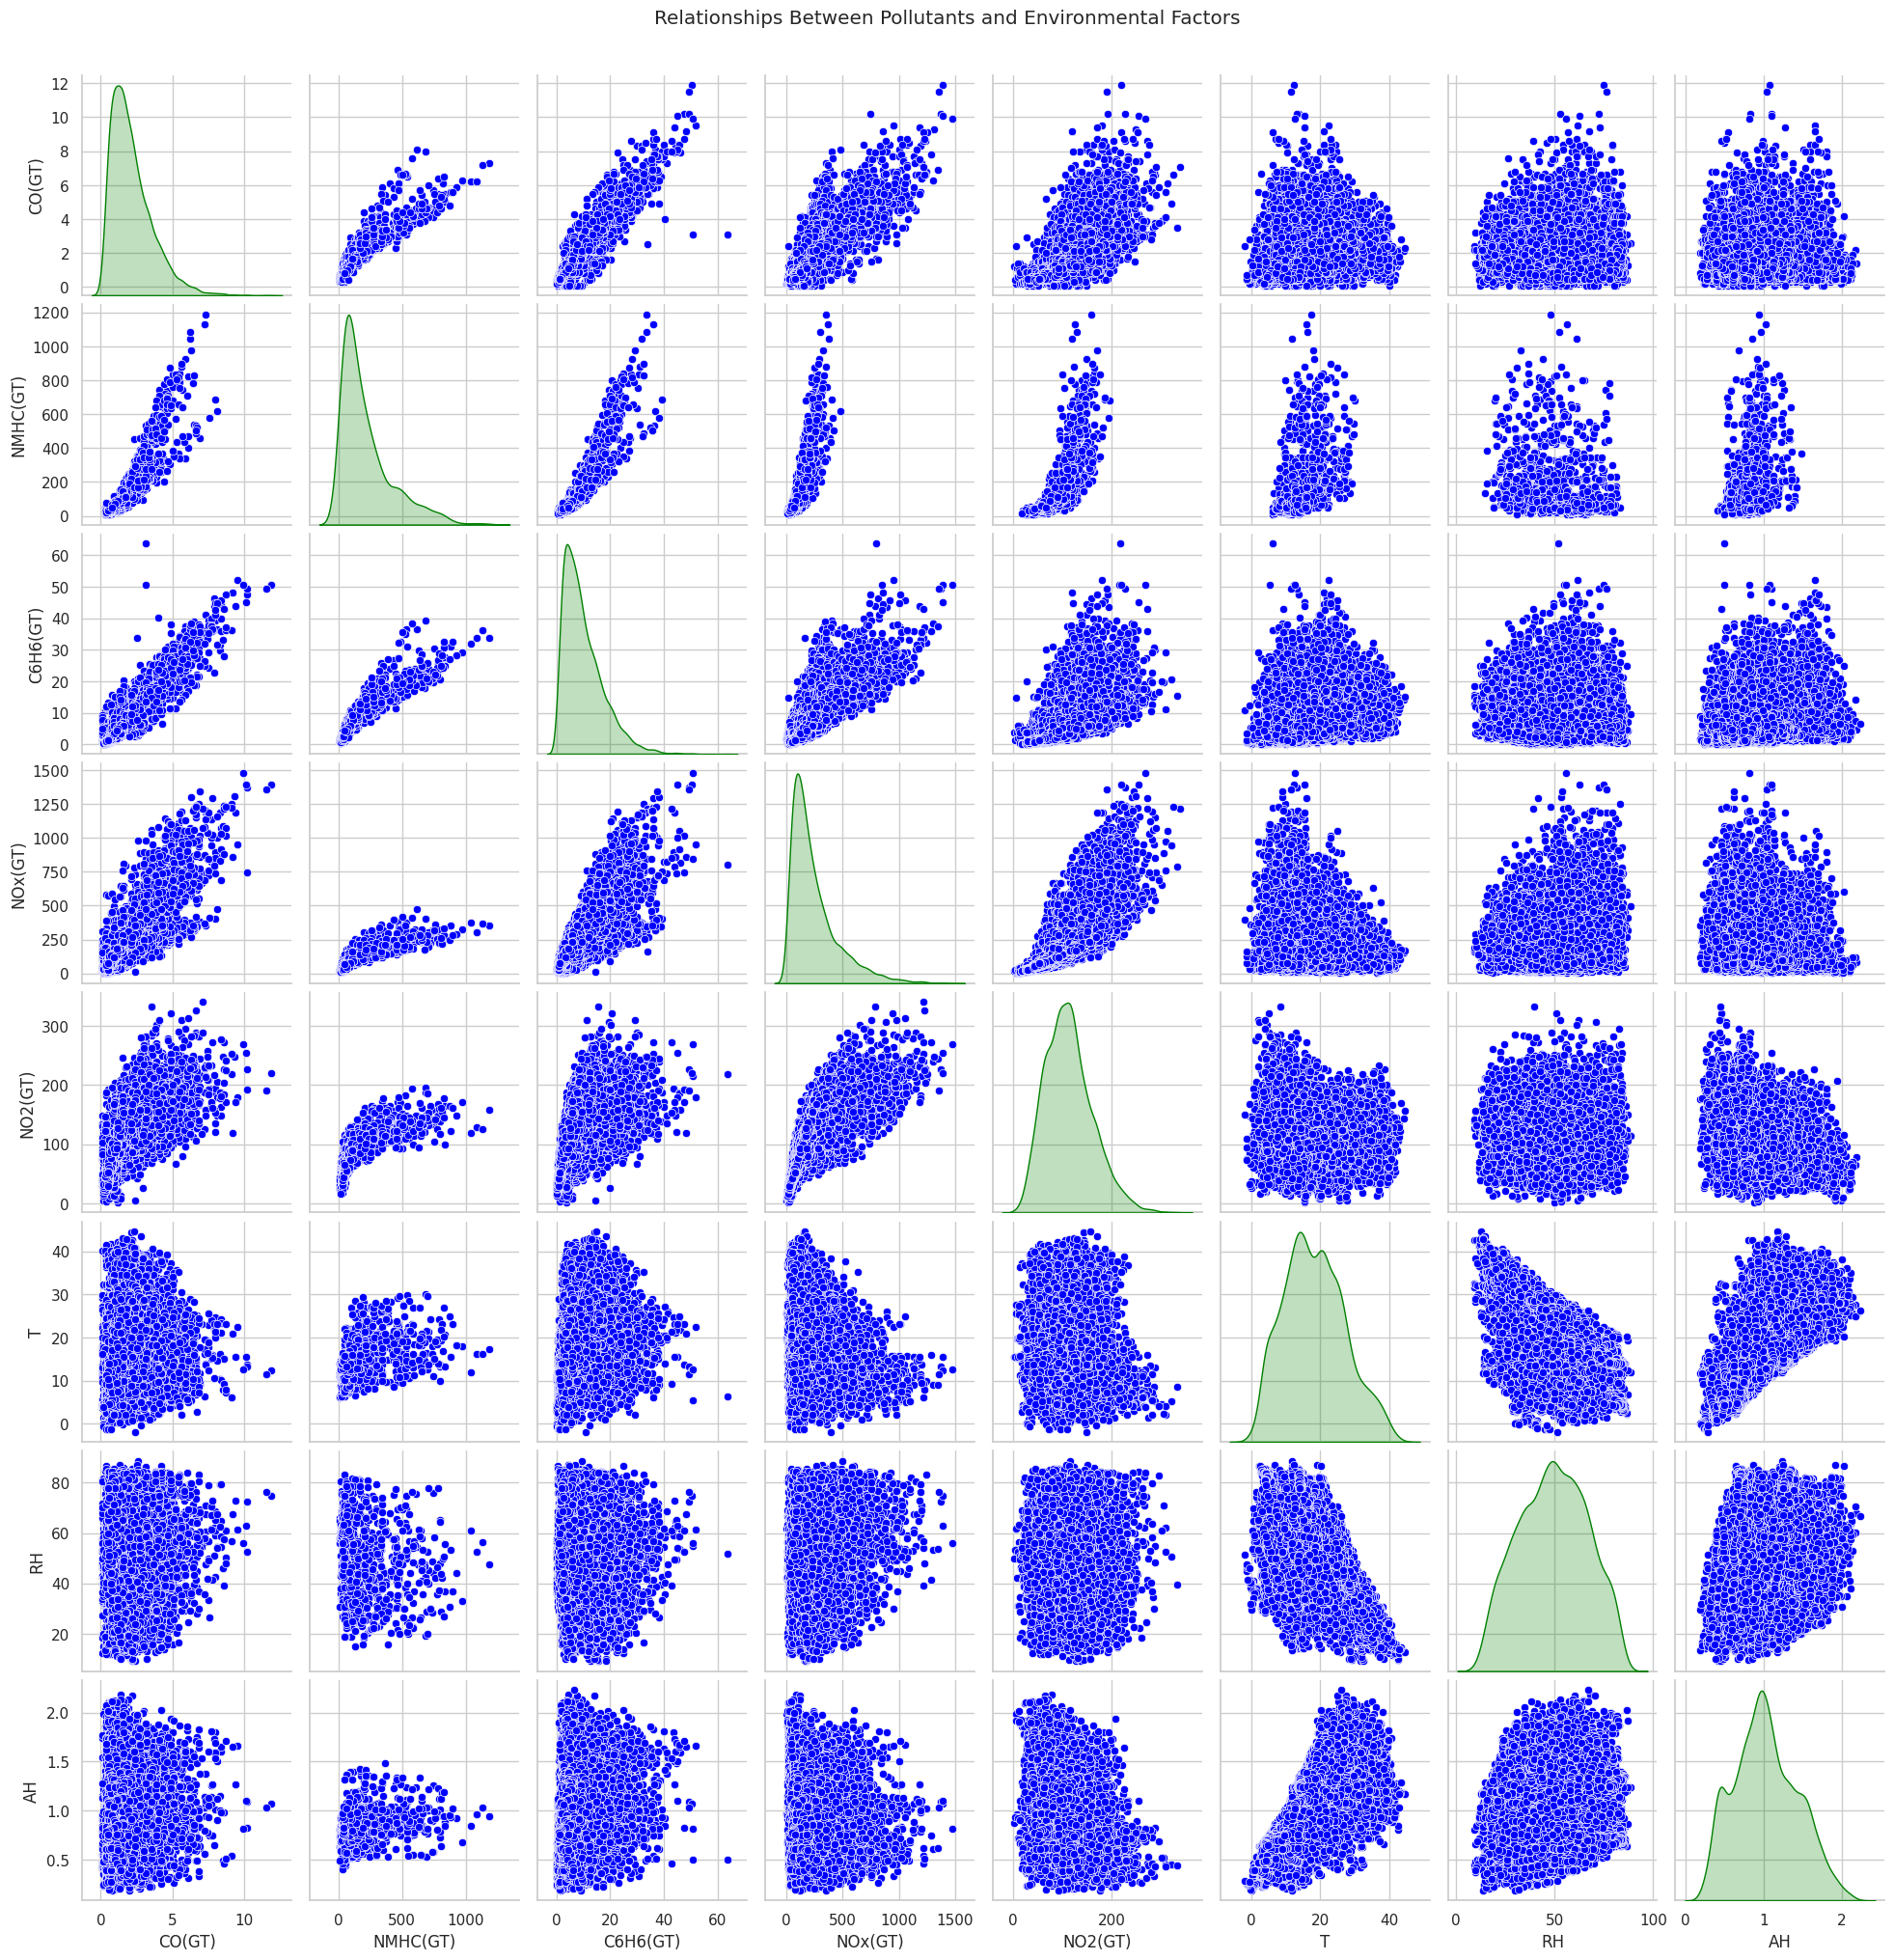

In [ ]:
import seaborn as sns

# Load the dataset
air_quality_data = pd.read_excel('AirQualityUCI.xlsx')

# Replace missing values (-200) with NaN
air_quality_data.replace(-200, float('NaN'), inplace=True)

# Select relevant columns (Pollutants and Environmental factors)
columns_of_interest = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']
data_subset = air_quality_data[columns_of_interest]

# Use different shades of blue for pollutants and green for environmental factors
palette_pollutants = sns.color_palette("Blues", 5)  # Pollutants color shades
palette_environment = sns.color_palette("Greens", 3)  # Environmental factors color shades

# Create a color dictionary for all variables (pollutants and environment)
colors_dict = {
    'CO(GT)': palette_pollutants[0],
    'NMHC(GT)': palette_pollutants[1],
    'C6H6(GT)': palette_pollutants[2],
    'NOx(GT)': palette_pollutants[3],
    'NO2(GT)': palette_pollutants[4],
    'T': palette_environment[0],
    'RH': palette_environment[1],
    'AH': palette_environment[2]
}

# Plot the pair plot with the specified colors for each component
sns.pairplot(data_subset, diag_kind="kde", plot_kws={'color': 'blue'}, diag_kws={'color': 'green'})
plt.suptitle('Relationships Between Pollutants and Environmental Factors', y=1.02)
plt.show()


Some of the key findings from the scatter plots:
- Strong positive correlations between pollutants like CO(GT), C6H6(GT), NOx(GT), and NO2(GT), indicating they likely share common sources (e.g., traffic, industry).
- Pollutants decrease with higher temperature (T), suggesting higher concentrations during colder periods, possibly due to increased heating and lower dispersion.
- Relative and Absolute Humidity (RH, AH) show negative correlations with pollutants, indicating that higher humidity levels reduce pollutant concentrations.
- Strong correlation between NOx(GT) and NO2(GT), as expected since they are related nitrogen compounds.
- Some non-linear relationships and clusters suggest other factors (e.g., geography or wind) may affect pollutant levels.

#Problem 4

Dataset: [Wine Classification Dataset](https://archive.ics.uci.edu/ml/datasets/wine)<br>
Dataset Description : These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

TODO 1: Calculate the cumulative variance explained by each of the first two principal components using the raw data (without standardization). Explain how much of the total variance is captured by these two components.

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('wine.data', sep = ',')
columns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
           'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
           'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data.columns = columns
data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [5]:
pca = PCA(n_components=2)
X = data.drop('Class', axis=1)
pca.fit(X)

PCA(n_components=2)

In [6]:
variance_ratio = pca.explained_variance_ratio_
cumulative_sum = variance_ratio.cumsum()

print("Cumulative Variance Ratio: ", cumulative_sum[1])
print("Variance Explained by PC-1: ", variance_ratio[0])
print("Variance Explained by PC-2: ", variance_ratio[1])

Cumulative Variance Ratio:  0.9998268137702635
Variance Explained by PC-1:  0.9981074257456646
Variance Explained by PC-2:  0.0017193880245989534


Since 99.98% of the total variance is captured by the first two principal components, this implies that these two components provide a good summary of the data. Almost all the patterns and relationships in the dataset can be understood by analyzing these two components alone, making them highly effective for dimensionality reduction without losing important information.

TODO 2: Use the function PCA() on the centered but not scaled data to calculate the principal components. Compare how the components differ when using centered-only data versus raw data. Discuss any shifts in the proportion of variance explained.

In [7]:
scaler = StandardScaler(with_mean=True, with_std=False)
centered_data = scaler.fit_transform(data)
centered_df = pd.DataFrame(centered_data, columns= data.columns)

In [8]:
pca = PCA(n_components=2)
X = centered_df.drop('Class', axis=1)
pca.fit(X)

PCA(n_components=2)

In [9]:
variance_ratio = pca.explained_variance_ratio_
cumulative_sum = variance_ratio.cumsum()

print("Cumulative Variance Ratio: ", cumulative_sum[1])
print("Variance Explained by PC-1: ", variance_ratio[0])
print("Variance Explained by PC-2: ", variance_ratio[1])

Cumulative Variance Ratio:  0.9998268137702636
Variance Explained by PC-1:  0.9981074257456647
Variance Explained by PC-2:  0.001719388024598954


- Interestingly, the variance explained by each principal component is identical for both the raw and centered data.
- This result demonstrates that centering the data before applying PCA does not affect the proportion of variance explained by each principal component.
- This suggests that the data's natural spread is dominant, and the influence of the mean is minimal.
- As a result, PCA captures almost the same amount of variance in both the raw and centered data

TODO 3: Use PCA on the standardized data but compute the top three principal components instead of the first two. Compare how much more variance is captured by including the third principal component.

In [16]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)

In [17]:
pca = PCA(n_components=3)
pca.fit(X_standardized)

PCA(n_components=3)

In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance_top_3 = explained_variance[:3]
cumulative_variance_top_2 = explained_variance[:2].sum()
cumulative_variance_top_3 = explained_variance[:3].sum()

In [19]:
print("Variance Explained by PC-1:", explained_variance_top_3[0])
print("Variance Explained by PC-2:", explained_variance_top_3[1])
print("Variance Explained by PC-3:", explained_variance_top_3[2])

print("Cumulative Variance for Top 2 Components:", cumulative_variance_top_2)
print("Cumulative Variance for Top 3 Components:", cumulative_variance_top_3)

Variance Explained by PC-1: 0.39335456938274166
Variance Explained by PC-2: 0.1786700310743114
Variance Explained by PC-3: 0.10381022440035582
Cumulative Variance for Top 2 Components: 0.5720246004570531
Cumulative Variance for Top 3 Components: 0.6758348248574089



- By including the third principal component (PC-3), we capture an additional 10.3% of the total variance
  - (PC-1 + PC-2) = 57.20%
  - (PC-1 + PC-2 + PC-3) = 67.58%

- PC-1 and PC-2 explain the majority of the variance (55.41%), but including PC-3 adds a significant portion of the remaining variance, helping better capture the overall data structure.

- Although PC-3 contributes less than PC-1 and PC-2, it still explains a meaningful amount of variance (10.3%).

**Raw and Centered Data:** Most of the variance (99.81%) is explained by the first component because features with larger values dominate.

**Standardized Data:** The variance is more evenly distributed, with 66.53% of the variance captured by the first three components, making the data structure clearer and capturing more meaningful relationships between features.


TODO 4: Compare the results of PCA on standardized vs. min-max normalized data. Discuss the impact of these two techniques on the PCA outcomes.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler_min_max = MinMaxScaler()
X_min_max = scaler_min_max.fit_transform(data)
pca_min_max = PCA()
pca_min_max.fit(X_min_max)
explained_variance_min_max = pca_min_max.explained_variance_ratio_[:3]
cumulative_variance_top_2_min_max = explained_variance_min_max[:2].sum()
cumulative_variance_top_3_min_max = explained_variance_min_max[:3].sum()

In [25]:
print("PCA on Min-Max Normalized Data (Top 3 Components):", explained_variance_min_max)
print("Cumulative Variance (Top 2):", cumulative_variance_top_2_min_max)
print("Cumulative Variance (Top 3):", cumulative_variance_top_3_min_max)

PCA on Min-Max Normalized Data (Top 3 Components): [0.50793809 0.14915698 0.06752332]
Cumulative Variance (Top 2): 0.657095070359545
Cumulative Variance (Top 3): 0.7246183895062416


**Comparing PCA on Standarized and Min-Max Normalisation**

**Variance Explained:**

***Min-Max Normalized:*** PC-1 explains 50.79% of the variance, significantly higher than 39.34% for Standardized data, indicating that normalization may inflate the importance of certain features.
***Standardized:*** The variance distribution is more balanced, with a gradual decrease from PC-1 to PC-3, suggesting a more nuanced extraction of relationships.


**Cumulative Variance:**

Cumulative variance for the top 2 components is 65.71%, while for Standardized it is 57.20%, showing Min-Max normalization captures more variability with fewer components but might mask subtler patterns.

TODO 5: Instead of plotting only the first two PCs, generate a 3D plot using the first three principal components. Use color to differentiate wine classes and interpret the additional insights from the third component.
python

In [26]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
y = data['Class']

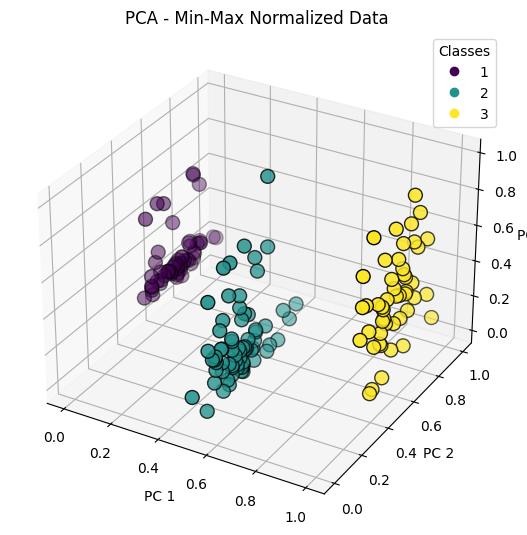

In [31]:
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_min_max[:, 0], X_min_max[:, 1], X_min_max[:, 2],
                        c=y, cmap='viridis', edgecolor='k', s=100)

ax1.set_title('PCA - Min-Max Normalized Data')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_zlabel('PC 3')
ax1.legend(*scatter1.legend_elements(), title="Classes")

#Problem 5<br>
Dataset: Life Expectancy

**Introduction:** The above dataset gives life expectancy related data for 37 countries in 2014.

Consider only the following variables in your analysis: 'GDP', 'Income composition of resources', 'Schooling', and 'Total expenditure'.

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Life Expectancy.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,Australia,2014,Developed,82.7,6,1,9.71,10769.363050,91.0,340,...,92,9.42,92,0.1,62214.691200,2346694.0,0.6,0.6,0.936,20.4
2,Austria,2014,Developed,81.4,66,0,12.32,8350.193523,98.0,117,...,98,11.21,98,0.1,51322.639970,8541575.0,1.8,2.0,0.892,15.9
3,Bangladesh,2014,Developing,71.4,132,98,0.01,10.446403,97.0,289,...,97,2.82,97,0.1,184.565430,15945279.0,18.1,18.6,0.570,10.0
4,Belgium,2014,Developed,89.0,76,0,12.60,7163.348923,98.0,70,...,99,1.59,99,0.1,47439.396840,112957.0,1.0,1.0,0.890,16.3


In [3]:
# Selecting the relevant columns for analysis: 'GDP', 'Income composition of resources', 'Schooling', 'Total expenditure'
selected_columns = ['GDP', 'Income composition of resources', 'Schooling', 'Total expenditure']
df_selected = df[selected_columns]

# Checking for any missing values in the selected columns
df_selected.isnull().sum()


GDP                                0
Income composition of resources    0
Schooling                          0
Total expenditure                  0
dtype: int64

TODO 1: Perform Z-score normalization on the numeric variables to scale the data. Compare the distribution of features before and after Z-score normalization and discuss the effect on variance.

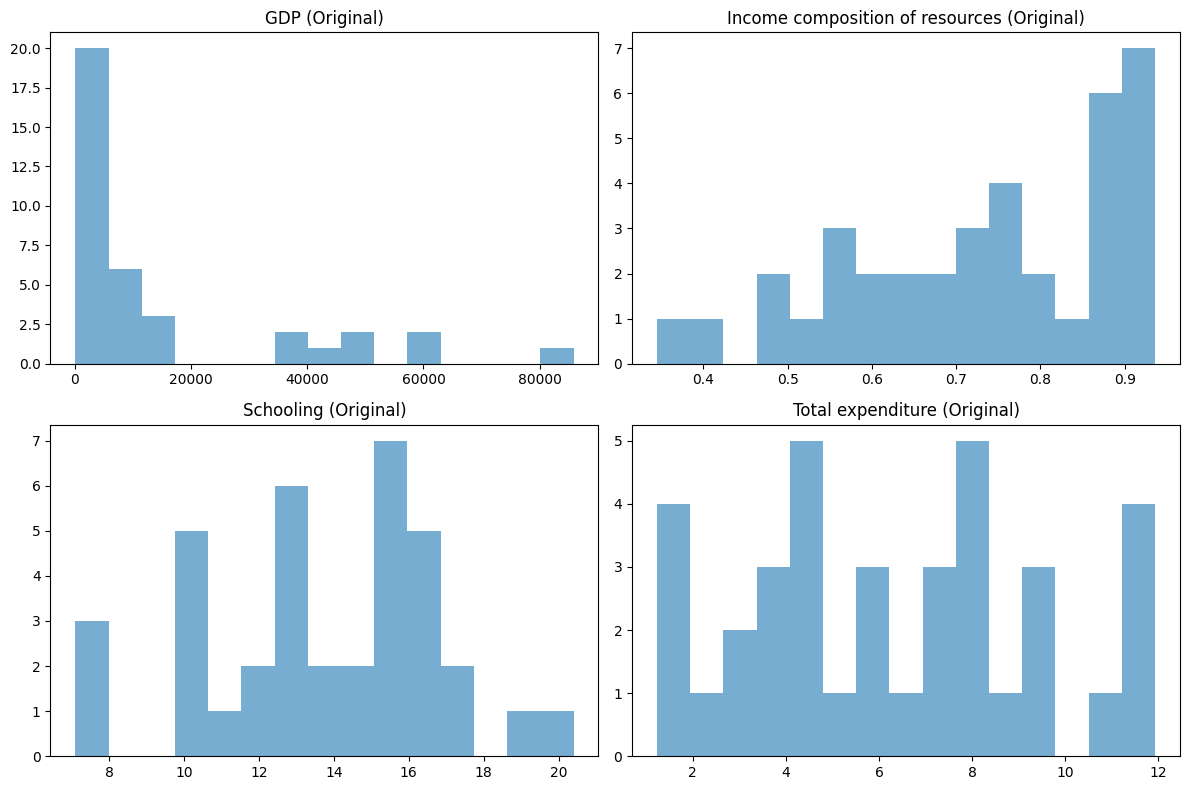

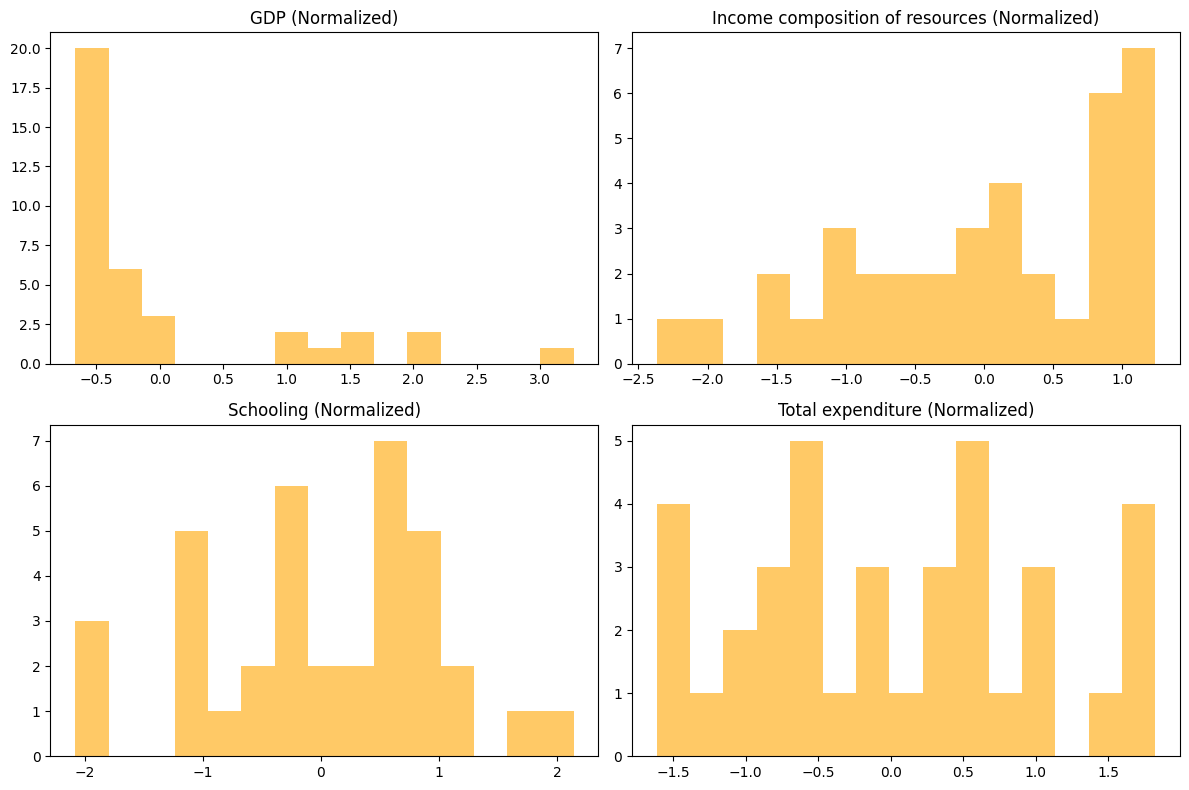

In [4]:
# Since there are no missing values, we can proceed with Z-score normalization.

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Performing Z-score normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Creating a DataFrame for the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=selected_columns)

# Plotting the distribution before and after Z-score normalization for comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original data distributions
for i, column in enumerate(selected_columns):
    ax = axes[i//2, i%2]
    ax.hist(df_selected[column], bins=15, alpha=0.6, label='Original')
    ax.set_title(f'{column} (Original)')
    
plt.tight_layout()
plt.show()

# After Z-score normalization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, column in enumerate(selected_columns):
    ax = axes[i//2, i%2]
    ax.hist(df_scaled[column], bins=15, alpha=0.6, color='orange', label='Z-score Normalized')
    ax.set_title(f'{column} (Normalized)')
    
plt.tight_layout()
plt.show()


TODO 2: Covariance Matrix and Eigen Decomposition (PCA)
This step involves performing Principal Component Analysis (PCA) for dimensionality reduction. You’ll compute the covariance matrix and use eigen decomposition to find principal components.

In [6]:
# Performing PCA (Principal Component Analysis)

import numpy as np

# Step 2: Covariance Matrix and Eigen Decomposition

# Calculating the covariance matrix of the normalized data
cov_matrix = np.cov(df_scaled.T)

# Eigen decomposition of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

TODO 3: Variance Explained by Each Principal Component
This step involves calculating how much variance each principal component explains.

In [7]:
# Step 3: Variance Explained by Each Principal Component
total_variance = np.sum(eigen_values)
explained_variance = [(i / total_variance) * 100 for i in sorted(eigen_values, reverse=True)]

# Displaying the explained variance for each principal component
explained_variance


[66.7674054661778, 19.130110943170116, 12.503344222148979, 1.5991393685031083]

TODO 4: Reconstructing the Data Using Principal Components
This task would involve using the principal components to approximate the original data by reconstructing it from the top few principal components.

In [10]:
%pip install ace_tools


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Step 4: Reconstructing the data using the top 2 principal components
# Using the top 2 principal components for reconstruction

# Project the original data onto the top 2 eigenvectors
top_2_eigenvectors = eigen_vectors[:, :2]
projected_data = np.dot(df_scaled, top_2_eigenvectors)

# Reconstructing the original data from the top 2 components
reconstructed_data = np.dot(projected_data, top_2_eigenvectors.T)

# Creating a DataFrame for the reconstructed data
df_reconstructed = pd.DataFrame(reconstructed_data, columns=selected_columns)




TODO 5: Compare Original Data with Reconstructed Data
The task here is to compare the original data with the reconstructed data to see the difference between the two.

In [ ]:
# Step 5: Comparing the original data with the reconstructed data
comparison = pd.DataFrame({
    'Original GDP': df_scaled['GDP'],
    'Reconstructed GDP': df_reconstructed['GDP'],
    'Original Income composition': df_scaled['Income composition of resources'],
    'Reconstructed Income composition': df_reconstructed['Income composition of resources'],
    'Original Schooling': df_scaled['Schooling'],
    'Reconstructed Schooling': df_reconstructed['Schooling'],
    'Original Total expenditure': df_scaled['Total expenditure'],
    'Reconstructed Total expenditure': df_reconstructed['Total expenditure'],
})




In [5]:
from IPython.display import display
display(comparison)

NameError: name 'comparison' is not defined